<a href="https://colab.research.google.com/github/GanThugSoLife/-/blob/main/Pogonya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-10-1bdaf876e511>:51: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  hare_point.set_data(Xhare[i], Yhare[i])
<ipython-input-10-1bdaf876e511>:52: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dog_point.set_data(Xdog[i], Ydog[i])


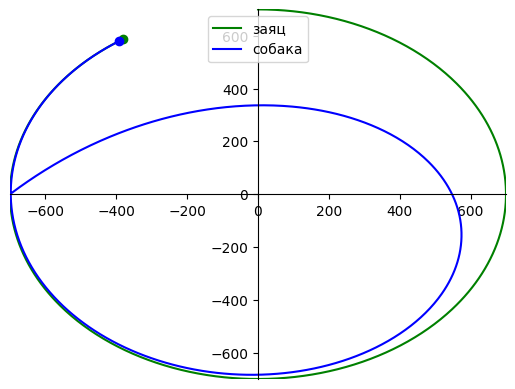

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

R = 700
Vhare = 5
Vdog = 5.35
dt = 1
da = (Vhare*dt) / R

n = 800  # Количество кадров анимации

Xhare = np.zeros(n)
Yhare = np.zeros(n)
Xdog = np.zeros(n)
Ydog = np.zeros(n)
f = np.zeros(n)

Xdog[0] = -R
Ydog[0] = 0

for i in range(n):
    Xhare[i] = R * np.sin(da*i)
    Yhare[i] = R * np.cos(da*i)
    f[i] = np.arctan2((Yhare[i] - Ydog[i]), (Xhare[i] - Xdog[i]))

fig, ax = plt.subplots()
ax.set_xlim(-R, R)
ax.set_ylim(-R, R)
ax = plt.gca()


hare_line, = ax.plot([], [], 'g-', label='заяц')
dog_line, = ax.plot([], [], 'b-', label='собака')
hare_point, = ax.plot([], [], 'go')
dog_point, = ax.plot([], [], 'bo')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def init():
    hare_line.set_data([], [])
    dog_line.set_data([], [])
    hare_point.set_data([], [])
    dog_point.set_data([], [])
    return hare_line, dog_line, hare_point, dog_point

def animate(i):
    hare_line.set_data(Xhare[:i+1], Yhare[:i+1])
    dog_line.set_data(Xdog[:i+1], Ydog[:i+1])
    hare_point.set_data(Xhare[i], Yhare[i])
    dog_point.set_data(Xdog[i], Ydog[i])
    return hare_line, dog_line, hare_point, dog_point

def update(frame):
    global Xdog, Ydog, f
    if frame < n-1:
        Xdog[frame+1] = Xdog[frame] + Vdog * dt * np.cos(f[frame])
        Ydog[frame+1] = Ydog[frame] + Vdog * dt * np.sin(f[frame])
        f[frame+1] = np.arctan2((Yhare[frame] - Ydog[frame]), (Xhare[frame] - Xdog[frame]))

    return animate(frame)

ax.legend()

ani = animation.FuncAnimation(fig, update, frames=n, interval=100, blit=True, init_func=init)
ani.save('Графика.mp4',fps=30, extra_args=['-vcodec','libx264'])
plt.show()